# Investigating unadjusted p-values from 0ppm vs 625ppm eQTL analysis

__Author:__ Bryan Quach  
__Date:__ May 01, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used DESeq2 normalized (median ratio normalization) TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney. The phenotype was the fold change in normalized expression between 625ppm and 0ppm BD treated CC mice.

## Calculating analysis statistics

### Lung

In [1]:
load("data/0ppm_vs_625ppm_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/0ppm_vs_625ppm_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [3]:
load("data/0ppm_vs_625ppm_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

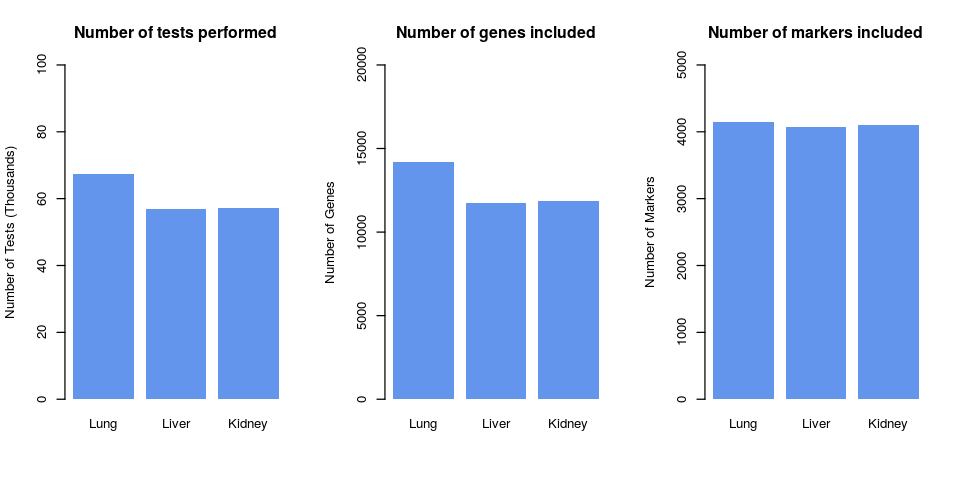

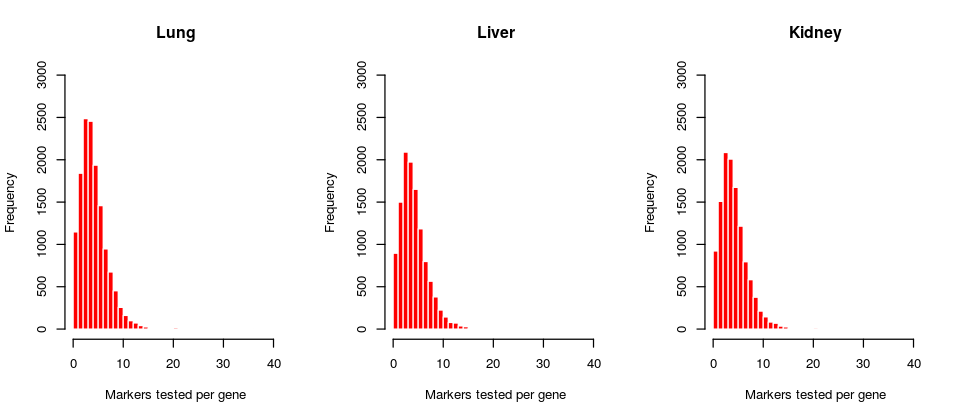

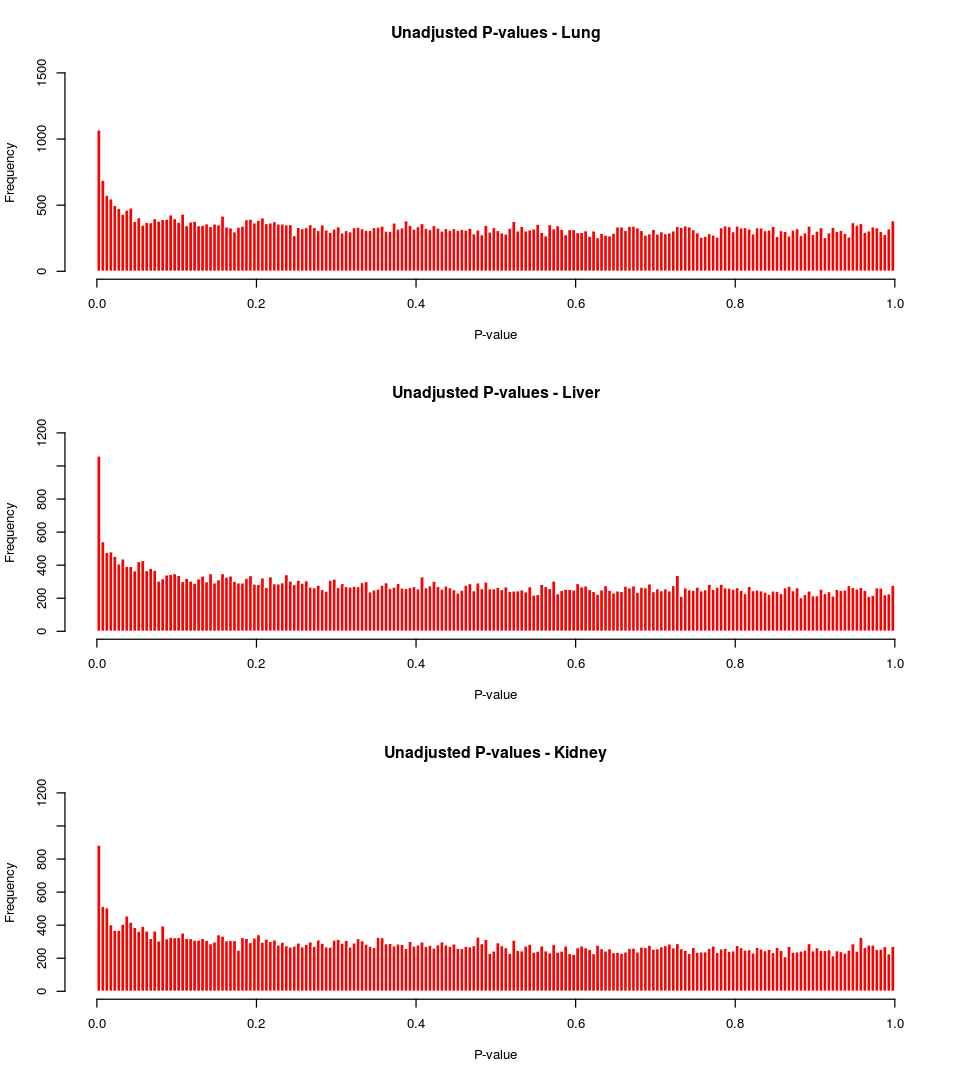

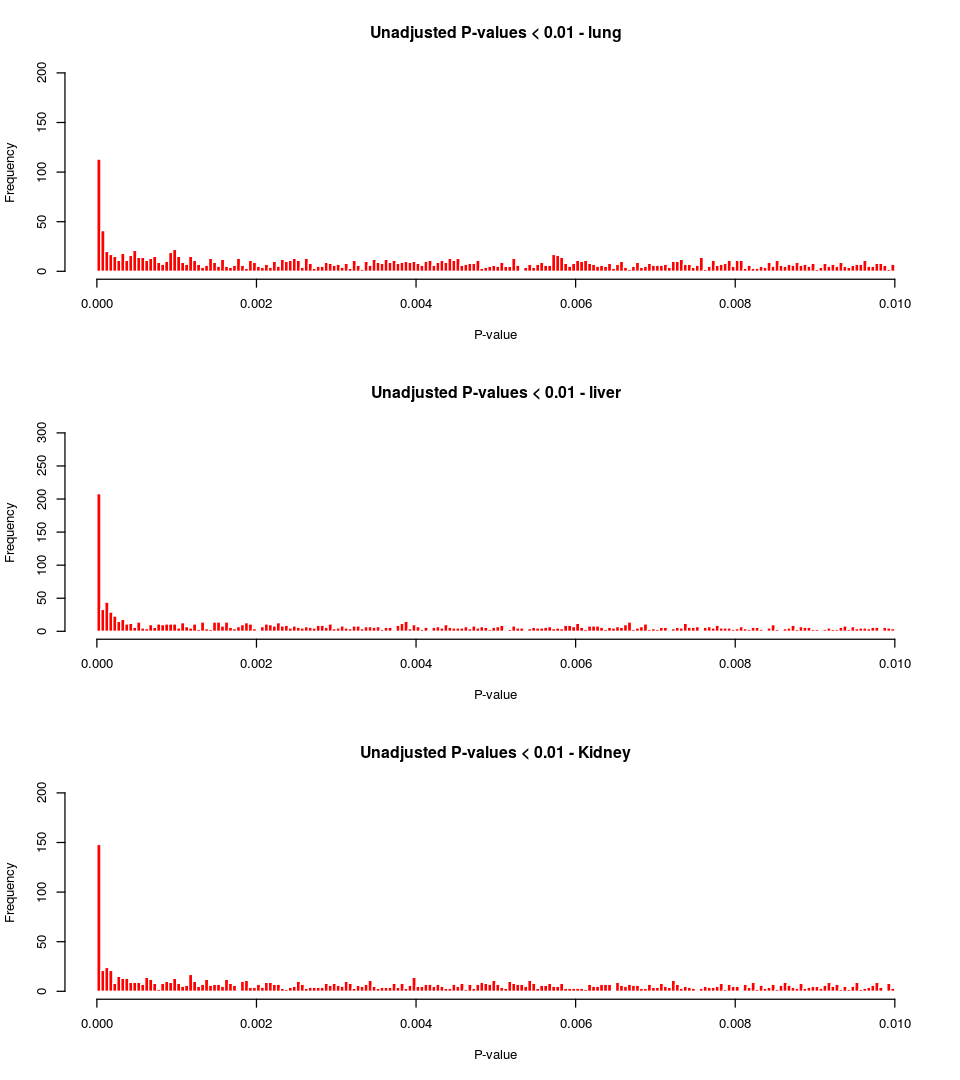

In [4]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1200), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1200), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,200), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,200), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [5]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/0ppm_vs_625ppm_lung.Rdata")
matrix.lung <- out.mat
load("data/0ppm_vs_625ppm_liver.Rdata")
matrix.liver <- out.mat
load("data/0ppm_vs_625ppm_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [6]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals_0_vs_625.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals_0_vs_625.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals_0_vs_625.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene          Marker                         P-value             
1   Klk1b3        JAX00150542.UNC12706160        1.52873730714153e-17
2   Klk1b3        UNC12706670.JAX00637356        1.56136357802678e-17
3   Klk1b3        UNC12722783.UNC12729352        1.58149644981409e-17
4   Cyp4f13       UNC27775382.JAX00075089        2.97691618463611e-11
5   Rhox8         UNC30750883.UNC30753391        8.15453397769719e-11
6   Olfr922       UNC16190786.JAX00691103        2.98548795061002e-10
7   Olfr922       UNC16177202.UNC16189957        3.12759160876175e-10
8   Rhox8         JAX00178139.JAX00710854        3.38769207213558e-10
9   Ly6f          UNC25896223.UNC25904367        2.46882446181286e-09
10  Zfp202        UNC16215275.JAX00170415        4.76606605496433e-09
11  Zfp202        JAX00691111.UNC16215188        8.19042999443511e-09
12  Zfp202        UNC16190786.JAX00691103        8.64995462121354e-09
13  Kti12         UNC7932936.UNC7947729          2.45334547970366e-08
14  Fam20c        UNC10291007.UNC10306321        2.50388001381424e-08
15  Calb2         UNC15475106.UNC15477711        5.53347674502388e-08
16  Calb2         UNC15478095.UNC15484083        5.79745874701387e-08
17  C130050O18Rik UNC10291007.UNC10306321        1.20465100580379e-07
18  Scarna6       JAX00258020.UNC1103435         1.59301592282624e-07
19  Prkar1b       UNC10291007.UNC10306321        2.25417144336267e-07
20  Prss54        UNC15261596.UNC15289340        2.28560324750724e-07
21  Prss54        UNC15290728.UNC15290993        2.47086890827337e-07
22  Prss54        UNC15290259.UNC15290706        2.72404192143105e-07
23  Nlrp1c-ps     UNC19872847.UNC19880458        3.05428122015321e-07
24  A930003O13Rik UNC8769425.UNC8791233          3.07932909777662e-07
25  Nlrp1c-ps     JAX00198578.UNC19882781        3.2932133814632e-07 
26  Nlrp1c-ps     UNC19894275.JAX00315100        4.48120595385416e-07
27  Shh           UNC8864558.UNC8865208          6.79472188255613e-07
28  Nlrp1c-ps     UNC19896849.UNC19898574        7.913456267726e-07  
29  Nlrp1c-ps     JAX00028823.UNC19893865        7.94640427981862e-07
30  C030018K13Rik UNC9340181.UNC9365328          8.0041824471052e-07 
⋮   ⋮             ⋮                              ⋮                   
71  Rab15         UNC21431183.UNC21450718        1.06316513455601e-05
72  Rab15         UNC21417007.UNC21430862        1.1318229171682e-05 
73  Olfr193       UNC26903376.JAX00422198        1.1633377464579e-05 
74  Prss54        UNC15291061.UNC15298896        1.16593907399472e-05
75  Prss54        JAX00677426.UNC15335709        1.30193458755865e-05
76  Blvra         UNC3915237.UNC3927323          1.34615834195405e-05
77  Stat4         JAX00003651.UNC662361          1.3785320326552e-05 
78  Stat4         UNC652639.UNC655907            1.48744599275479e-05
79  Zfp764        UNC13807161.UNC13807864        1.49836813458256e-05
80  Prss54        UNC15298908.UNC15299899        1.52544696473772e-05
81  Stat4         JAX00250410.UNC661934          1.5499618773702e-05 
82  1700054M17Rik UNC3817290.UNC3817950          1.57045540188759e-05
83  Chchd10       JAX00019727.JAX00019795        1.81250621520647e-05
84  Mir6416       UNC070516320.UNC13020010       1.83100476334269e-05
85  Ssxb10        UNC30618429.JAX00708748        2.17632653119394e-05
86  Osgep         UNC23990985.backupUNC140394528 2.30324210260094e-05
87  Stat4         JAX00249717.UNC651262          2.31505961875418e-05
88  Lrrc72        UNC20880016.UNC20898235        2.340081705592e-05  
89  Lrrc72        UNC20898693.UNC20907554        2.50534740989177e-05
90  Lrrc72        JAX00330700.UNC_rs48206748     2.5289085092975e-05 
91  Ssxb10        UNC30619220.JAX00176788        2.62871444170007e-05
92  Tmem69        JAX00562461.UNC8051973         2.66590690349413e-05
93  Osgep         UNC140178161.UNC23990240       2.66784456504908e-05
94  Txnl4b        UNC15470016.UNC080433052       3.31757136913386e-05
95  Ssxb10        UNC30620787.UNC30622947        3.52517361347657e-05
96  Cd40      

Liver


Gene      Marker                   P-value             
1   Cs        JAX00302230.UNC18963675  5.29106197553389e-45
2   Cs        UNC18963682.JAX00302406  5.61931541441145e-45
3   Cs        UNC18954707.UNC18961845  8.64575105225521e-45
4   Tbc1d15   UNC18783466.UNC18790786  2.53279768278154e-25
5   Tbc1d15   UNC18771926.UNC18777516  3.229128048637e-25  
6   Gch1      UNC23970682.UNC23981059  1.09553899208733e-23
7   Mettl7b   UNC18980143.UNC18983661  6.07994670811277e-23
8   Mettl7b   UNC18970636.UNC101328991 6.35086469286274e-23
9   Mettl7b   JAX00302462.JAX00302527  6.62826634138173e-23
10  Mettl7b   UNC18963682.JAX00302406  6.8058955105809e-23 
11  Tmem184a  UNC10291007.UNC10306321  9.30218980140772e-18
12  Pbx3      UNC2862710.UNC2910745    4.90200899823609e-17
13  Pbx3      UNC2845901.UNC2862042    6.09023803942199e-17
14  Farsb     UNC995424.UNC1036770     8.35408457474283e-16
15  Farsb     UNC991403.JAX00256367    1.67280802409064e-15
16  Arhgef25  UNC18933797.JAX00023513  1.76802931996127e-15
17  Farsb     JAX00256220.JAX00256288  1.81239970747409e-15
18  Arhgef25  UNC18954024.UNC18954348  2.21054970813405e-15
19  Arhgef25  UNC18954707.UNC18961845  2.3483210616362e-15 
20  Inhbe     UNC18933797.JAX00023513  2.93080717643656e-15
21  Inhbe     UNC18954024.UNC18954348  3.05531521978928e-15
22  Inhbe     UNC18963682.JAX00302406  3.15707332348389e-15
23  Inhbe     JAX00302230.UNC18963675  3.16877441556098e-15
24  Inhbe     UNC18954707.UNC18961845  3.19660538467288e-15
25  Myef2     JAX00502398.UNC3914924   3.24206523765149e-15
26  Myef2     UNC3904397.UNC3914380    3.24206642810674e-15
27  Myef2     UNC3901678.UNC3903867    3.29351342468759e-15
28  Myef2     UNC3915237.UNC3927323    3.64100689188355e-15
29  Arhgef25  UNC18963682.JAX00302406  3.88225833632811e-15
30  Arhgef25  JAX00302230.UNC18963675  3.96101461409068e-15
⋮   ⋮         ⋮                        ⋮                   
71  Gm17801   UNC27694572.UNC27714988  5.36092555136579e-08
72  Rad21l    JAX00101596.UNC4230076   8.06327757014802e-08
73  Rad21l    UNC4230433.JAX00101624   9.07124066371846e-08
74  Dyrk2     JAX00300302.UNC18847088  9.33728842730615e-08
75  Rad21l    UNC4231314.UNC4240403    9.73096716589237e-08
76  Rad21l    JAX00101732.UNC4244689   9.8390314289882e-08 
77  Rad21l    UNC4242301.UNC4242810    9.85700097008672e-08
78  Rad21l    UNC4240934.UNC4241542    9.89670255059342e-08
79  Rad21l    UNC4230993.UNC020228210  9.98090381375412e-08
80  Rad21l    UNC4230833.UNC4230865    9.98599782267014e-08
81  Tmem184a  UNC10306786.UNC10306786  1.03655628486699e-07
82  Rprl3     JAX00659261.UNC14053566  1.06843376733598e-07
83  Chrna2    UNC24144884.UNC24154070  1.28166311684459e-07
84  Rprl3     JAX00659253.JAX00659253  1.2873529307984e-07 
85  Mir3058   UNC18471910.UNC18474836  1.31855778356375e-07
86  Mir3058   UNC18475040.UNC18480813  1.48687995636372e-07
87  Mir3058   UNC18481354.UNC18483765  1.53641865215242e-07
88  Gm17801   UNC170299097.UNC27694074 2.28261232391615e-07
89  LOC547349 JAX00437187.JAX00437514  2.52822407367532e-07
90  Lad1      UNC1751623.UNC1758020    2.7356045330282e-07 
91  Hspb1     UNC10239614.JAX00598489  2.94845440021266e-07
92  LOC547349 JAX00436767.JAX00075291  2.95985620663188e-07
93  Hspb1     UNC10247043.UNC10251963  2.99171369049375e-07
94  Igfbp2    UNC932547.UNC939418      3.17439070200074e-07
95  Hspb1     JAX00136067.UNC10236173  3.23613788507659e-07
96  Xpa       UNC7150041.UNC040499102  3.88953170274756e-07
97  Hspb1     UNC10243742.UNC10244171  4.01246203028e-07   
98  Hspb1     UNC10244622.UNC10246662  4.14412302892921e-07
99  Hspb1     UNC10236492.UNC10239286  4.32497729862546e-07
100 Lad1      UNC1735400.UNC1751427    4.55505286047675e-07

Kidney


Gene          Marker                         P-value              
1   Scgb1b29      UNC12581313.JAX00149918        1.74372094263664e-135
2   Scgb1b29      UNC12586775.UNC12586775        1.83991342715292e-135
3   Scgb1b29      UNC070069629.UNC12586965       1.85867197369161e-135
4   Scgb1b29      UNC070070026.UNC070070026      1.90112859889371e-135
5   Cfap206       UNC7051473.JAX00548318         8.25514466436656e-74 
6   Cfap206       UNC7048955.UNC7051291          1.38499981120051e-73 
7   Lgals3        UNC23970682.UNC23981059        3.44265842084342e-37 
8   Gm14288       UNC4549947.UNC4556034          9.11737129464036e-24 
9   Gm14288       JAX00512370.UNC4561324         1.6566754888717e-23  
10  Gm14288       UNC4556542.UNC4558476          1.70133492164514e-23 
11  Gm13580       UNC3167310.UNC3170841          2.31595451389204e-19 
12  3632451O06Rik UNC23970682.UNC23981059        3.53676953140357e-18 
13  3632451O06Rik UNC23981303.UNC23982070        3.84877718358153e-18 
14  3632451O06Rik UNC140178161.UNC23990240       5.17132572141368e-18 
15  Cfap206       JAX00548233.UNC040493917       6.01886567039705e-18 
16  3632451O06Rik UNC23990985.backupUNC140394528 8.71966275201071e-18 
17  Zbed5         UNC10173561.UNC10177662        2.65665793003436e-17 
18  Hcfc1r1       UNC170299097.UNC27694074       1.28380040542582e-15 
19  Slc9a5        UNC15422872.UNC15460754        2.71213620861644e-15 
20  Dlgap5        UNC23970682.UNC23981059        2.83301143363338e-14 
21  Cmtm3         UNC15417874.UNC15422538        1.90682917192931e-11 
22  Cmtm3         UNC15422872.UNC15460754        2.36329534550297e-11 
23  Cmtm3         UNC15416961.JAX00679081        5.06309866321766e-11 
24  Lynx1         UNC25871106.UNC25886541        1.07522061423098e-10 
25  Lynx1         UNC25896223.UNC25904367        1.08319945294955e-10 
26  Cmtm3         UNC15401027.JAX00679070        1.13185388655839e-10 
27  Lynx1         UNC25886803.UNC25888076        1.15314658405285e-10 
28  E130008D07Rik UNC27900544.UNC27900544        1.53769395568593e-10 
29  Lynx1         UNC25888851.UNC25895704        1.75256626579389e-10 
30  4930506A18Rik UNC15422872.UNC15460754        5.59507134344694e-10 
⋮   ⋮             ⋮                              ⋮                    
71  Gm8978        UNC30216687.UNC30216687        8.55442363180921e-07 
72  Hist1h4a      UNC22267867.UNC22314902        9.13004018799597e-07 
73  E130008D07Rik UNC27853628.UNC27900428        1.43453814253607e-06 
74  Slc6a19os     UNC22845435.UNC22853947        1.53078161643975e-06 
75  N4bp2l1       UNC10451000.UNC10451000        1.59130672510537e-06 
76  N4bp2l1       UNC10451055.JAX00137288        2.34447088121336e-06 
77  N4bp2l1       UNC10462381.UNC10462381        2.34447577172604e-06 
78  Mir8108       UNC14338945.UNC14340808        2.5564060550231e-06  
79  Mir8108       JAX00663607.JAX00663607        2.55743803715626e-06 
80  Mir8108       UNC14338157.UNC14338157        2.55787299753727e-06 
81  Mir8108       UNC14337730.UNC14337730        2.55831072281993e-06 
82  Mir8108       UNC14337122.UNC14337122        2.55875113568541e-06 
83  Mir8108       UNC14334951.JAX00159821        2.55986349523849e-06 
84  Mir8108       UNC14334524.UNC14334524        2.5608629467872e-06  
85  Mir8108       JAX00663556.UNC14333584        2.67180091627285e-06 
86  Mir8108       UNC14323091.JAX00663443        2.92713612011033e-06 
87  Mir8108       UNC14326048.UNC14326048        2.92785914894161e-06 
88  Mir8108       UNC14326919.UNC14326919        2.92802518580373e-06 
89  Mir8108       UNC14327672.JAX00159775        2.92822998794201e-06 
90  Mir8108       UNC14329978.UNC080083433       2.92847485038701e-06 
91  Mir8108       JAX00159794.UNC14333027        3.06001570482962e-06 
92  Mir8108       UNC14332082.UNC14332082        3.07073444795209e-06 
93  Mir8108       UNC14332488.UNC14332488        3.07145437050746e-06 
94  N4bp2l1       UNC10429359.UNC10450582        3.15534651115902e-06 
95  Nsg1          UNC8995230